<a href="https://colab.research.google.com/github/mahault/ContinuousTraining/blob/main/Gaussian_regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

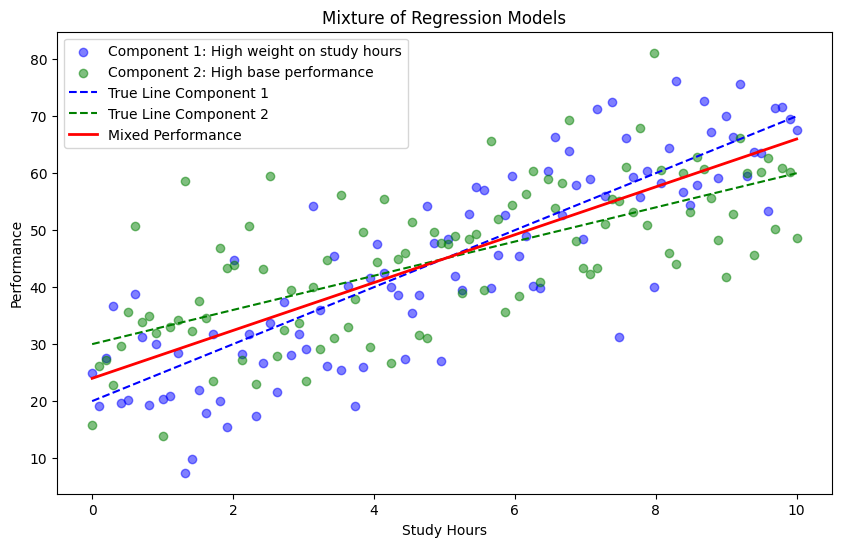

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate synthetic data
np.random.seed(42)
study_hours = np.linspace(0, 10, 100)
true_performance_component1 = 5 * study_hours + 20  # More weight on study hours
true_performance_component2 = 3 * study_hours + 30  # Less weight but higher base performance

# Add some noise
performance_component1 = true_performance_component1 + np.random.normal(0, 10, study_hours.shape)
performance_component2 = true_performance_component2 + np.random.normal(0, 10, study_hours.shape)

# Mixture probabilities (could be dynamic, but we use static here for simplicity)
pi_1 = 0.6  # Probability of component 1
pi_2 = 0.4  # Probability of component 2

# Combined performance prediction
mixed_performance = pi_1 * true_performance_component1 + pi_2 * true_performance_component2

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(study_hours, performance_component1, alpha=0.5, label='Component 1: High weight on study hours', color='blue')
plt.scatter(study_hours, performance_component2, alpha=0.5, label='Component 2: High base performance', color='green')
plt.plot(study_hours, true_performance_component1, 'b--', label='True Line Component 1')
plt.plot(study_hours, true_performance_component2, 'g--', label='True Line Component 2')
plt.plot(study_hours, mixed_performance, 'r-', linewidth=2, label='Mixed Performance')
plt.xlabel('Study Hours')
plt.ylabel('Performance')
plt.title('Mixture of Regression Models')
plt.legend()
plt.show()


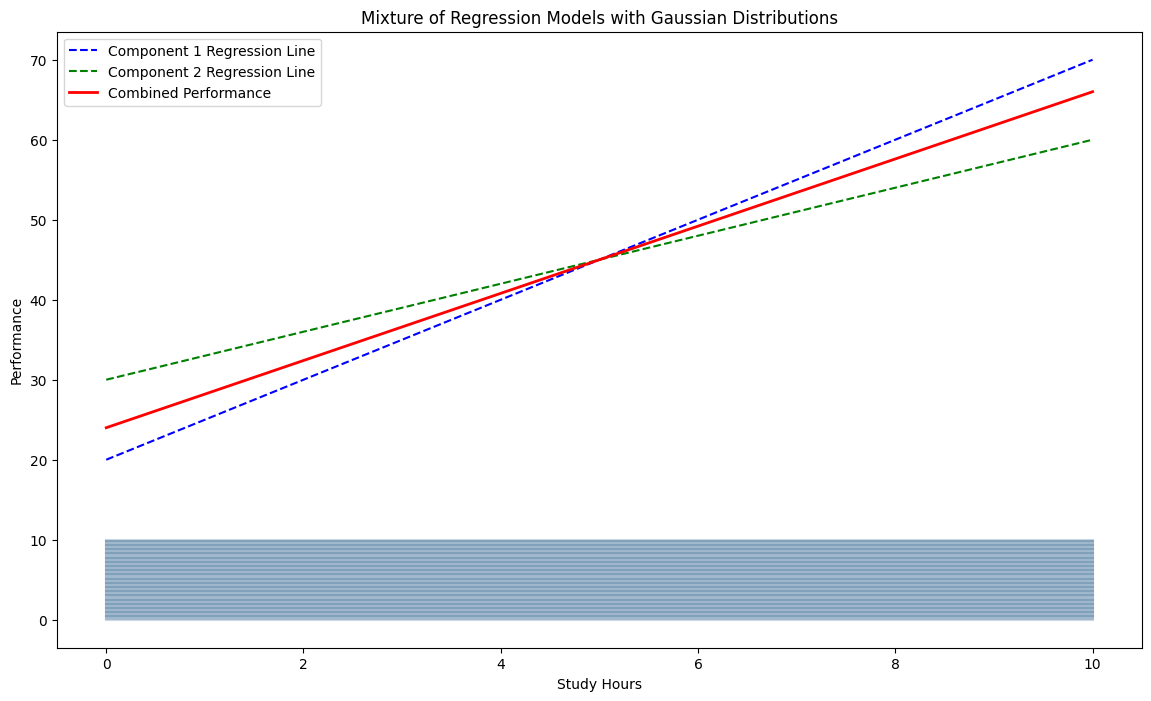

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate synthetic data
np.random.seed(42)
study_hours = np.linspace(0, 10, 100)
true_performance_component1 = 5 * study_hours + 20  # More weight on study hours
true_performance_component2 = 3 * study_hours + 30  # Less weight but higher base performance

# Variability for Gaussian distributions
std_dev1 = 10
std_dev2 = 10

# Mixture probabilities
pi_1 = 0.6  # Probability of component 1
pi_2 = 0.4  # Probability of component 2

# Plot the results
plt.figure(figsize=(14, 8))

# Plotting the Gaussian distributions around each line
x_values = np.linspace(np.min(study_hours), np.max(study_hours), 300)
for i, hours in enumerate(study_hours):
    # Component 1 Gaussian
    y_values1 = norm.pdf(x_values, true_performance_component1[i], std_dev1)
    plt.plot(x_values, y_values1 / 10 + hours, "b", alpha=0.1)  # scaled for visibility

    # Component 2 Gaussian
    y_values2 = norm.pdf(x_values, true_performance_component2[i], std_dev2)
    plt.plot(x_values, y_values2 / 10 + hours, "g", alpha=0.1)  # scaled for visibility

# Plot regression lines for clarity
plt.plot(study_hours, true_performance_component1, 'b--', label='Component 1 Regression Line')
plt.plot(study_hours, true_performance_component2, 'g--', label='Component 2 Regression Line')

# Combine Gaussians weighted by pi
combined_performance = pi_1 * true_performance_component1 + pi_2 * true_performance_component2
plt.plot(study_hours, combined_performance, 'r-', linewidth=2, label='Combined Performance')

plt.xlabel('Study Hours')
plt.ylabel('Performance')
plt.title('Mixture of Regression Models with Gaussian Distributions')
plt.legend()
plt.show()


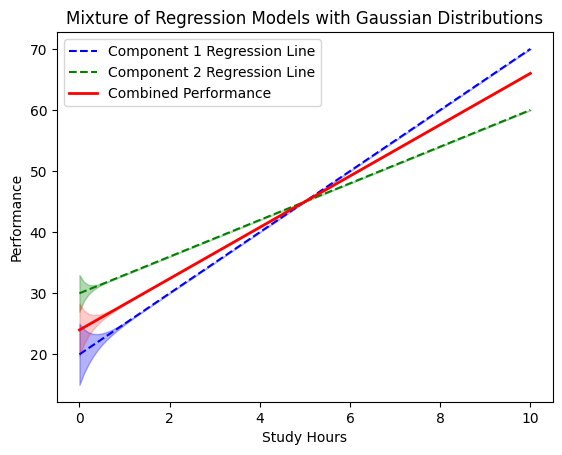

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate synthetic data for study hours
study_hours = np.linspace(0, 10, 100)

# Define regression lines for two components
line1 = 5 * study_hours + 20
line2 = 3 * study_hours + 30

# Standard deviations for the Gaussian distributions of each component
std_dev1 = 5
std_dev2 = 3

# Mixture probabilities
pi_1 = 0.6
pi_2 = 0.4

# Generate Gaussian distributions around the regression lines
gaussian1 = norm.pdf(study_hours, line1, std_dev1)
gaussian2 = norm.pdf(study_hours, line2, std_dev2)

# Normalize Gaussian values for visualization purposes
gaussian1 /= gaussian1.max()
gaussian2 /= gaussian2.max()

# Plot the regression lines
plt.plot(study_hours, line1, 'b--', label='Component 1 Regression Line')
plt.plot(study_hours, line2, 'g--', label='Component 2 Regression Line')

# Plot the Gaussian distributions
plt.fill_between(study_hours, line1 - gaussian1 * std_dev1, line1 + gaussian1 * std_dev1, color='blue', alpha=0.3)
plt.fill_between(study_hours, line2 - gaussian2 * std_dev2, line2 + gaussian2 * std_dev2, color='green', alpha=0.3)

# Combine the Gaussian distributions based on mixture probabilities
combined_line = pi_1 * line1 + pi_2 * line2
combined_std_dev = np.sqrt(pi_1 * (std_dev1 ** 2) + pi_2 * (std_dev2 ** 2))
combined_gaussian = pi_1 * gaussian1 + pi_2 * gaussian2

plt.plot(study_hours, combined_line, 'r-', linewidth=2, label='Combined Performance')
plt.fill_between(study_hours, combined_line - combined_gaussian * combined_std_dev, combined_line + combined_gaussian * combined_std_dev, color='red', alpha=0.2)

plt.xlabel('Study Hours')
plt.ylabel('Performance')
plt.title('Mixture of Regression Models with Gaussian Distributions')
plt.legend()
plt.show()


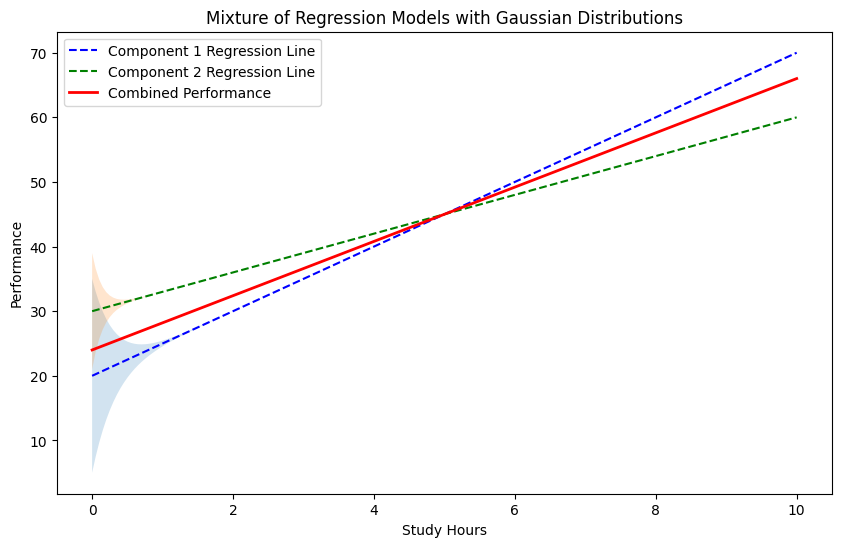

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate synthetic data for study hours
study_hours = np.linspace(0, 10, 200)

# Define regression lines for two components
line1 = 5 * study_hours + 20  # Component 1: y = 5x + 20
line2 = 3 * study_hours + 30  # Component 2: y = 3x + 30

# Standard deviations for the Gaussian distributions of each component
std_dev1 = 5
std_dev2 = 3

# Mixture probabilities
pi_1 = 0.6
pi_2 = 0.4

# Combined performance
combined_line = pi_1 * line1 + pi_2 * line2

# Plot the regression lines and combined performance
plt.figure(figsize=(10, 6))
plt.plot(study_hours, line1, 'b--', label='Component 1 Regression Line')
plt.plot(study_hours, line2, 'g--', label='Component 2 Regression Line')
plt.plot(study_hours, combined_line, 'r-', linewidth=2, label='Combined Performance')

# Plot the Gaussian distributions
for i, (mu, std_dev) in enumerate(zip([line1, line2], [std_dev1, std_dev2])):
    # Compute the Gaussian distribution for each point on the line
    pdf = norm.pdf(study_hours, mu, std_dev)

    # Normalize the PDF to reflect it in the plot's scale
    pdf_scaled = pdf / pdf.max() * std_dev * 3  # Scale factor for visualization

    # Fill between the positive and negative values around the regression line
    plt.fill_between(study_hours, mu - pdf_scaled, mu + pdf_scaled, alpha=0.2)

# Add labels and title
plt.xlabel('Study Hours')
plt.ylabel('Performance')
plt.title('Mixture of Regression Models with Gaussian Distributions')
plt.legend()

# Show the plot
plt.show()


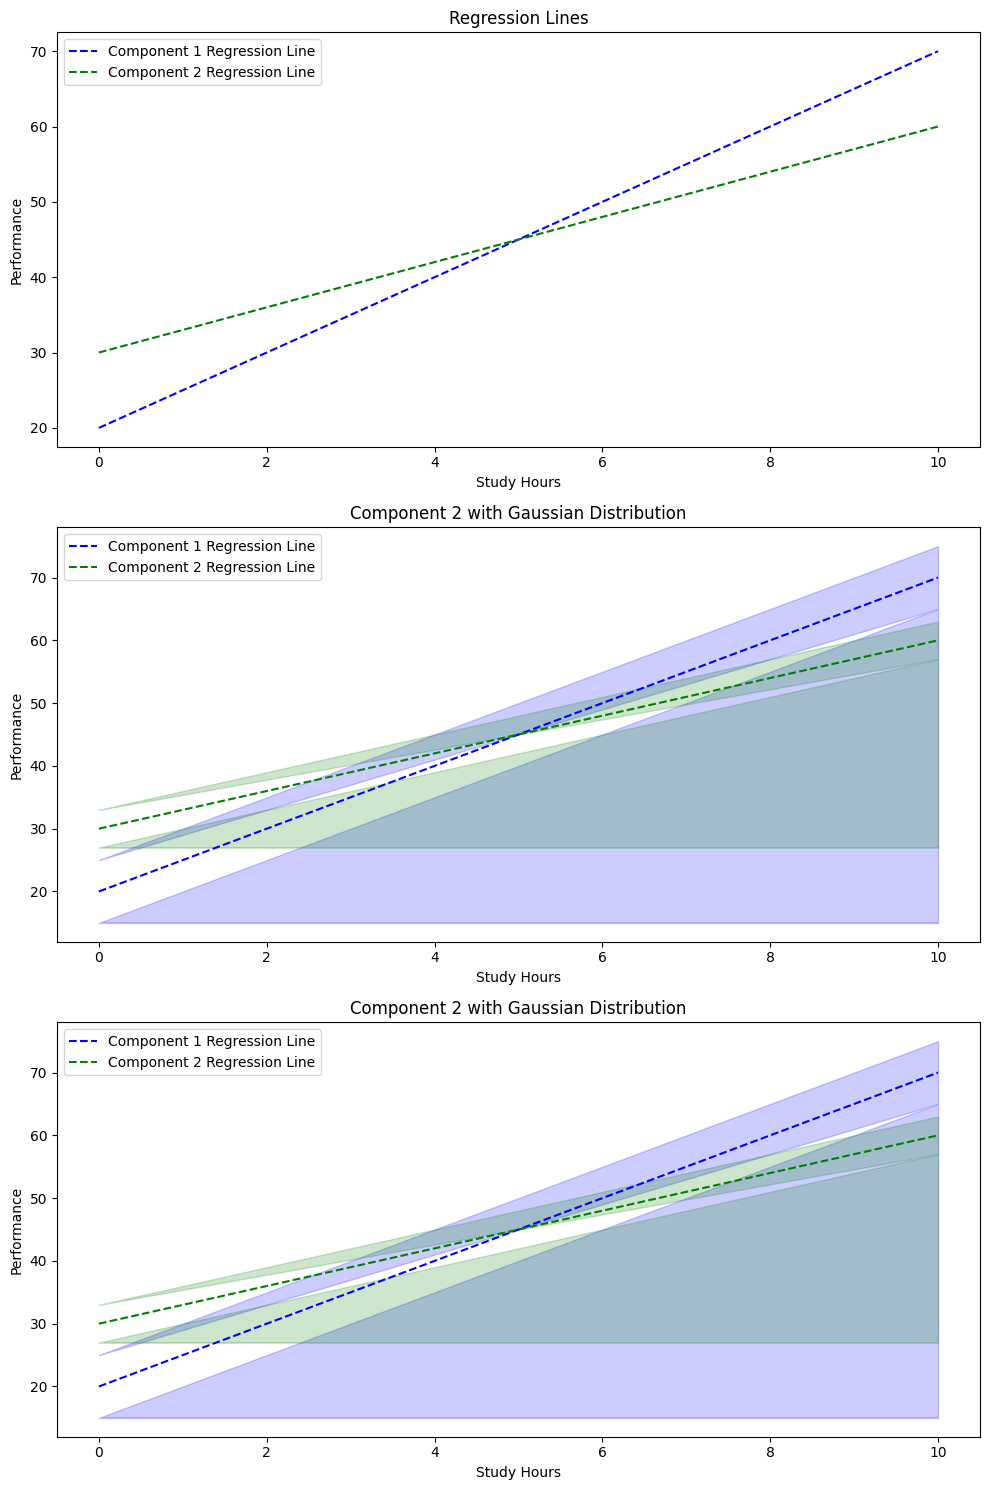

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Function to plot Gaussian distribution
def plot_gaussian(ax, study_hours, line, std_dev, color, label):
    y_values = line
    x_values = np.tile(study_hours, (2, 1)).flatten()
    y_upper = y_values + std_dev
    y_lower = y_values - std_dev
    y_gaussian = np.vstack([y_lower, y_upper]).flatten()

    ax.fill_between(x_values, y_gaussian.min(), y_gaussian, color=color, alpha=0.2)
    ax.plot(study_hours, y_values, color=color, linestyle='--', label=f'{label} Regression Line')
    ax.set_title(f'{label} with Gaussian Distribution')
    ax.set_xlabel('Study Hours')
    ax.set_ylabel('Performance')
    ax.legend()

# Generate synthetic data
study_hours = np.linspace(0, 10, 200)
line1 = 5 * study_hours + 20
line2 = 3 * study_hours + 30

# Standard deviations
std_dev1 = 5
std_dev2 = 3

# Set up the subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot 1: Regression lines only
axs[0].plot(study_hours, line1, 'b--', label='Component 1 Regression Line')
axs[0].plot(study_hours, line2, 'g--', label='Component 2 Regression Line')
axs[0].set_title('Regression Lines')
axs[0].set_xlabel('Study Hours')
axs[0].set_ylabel('Performance')
axs[0].legend()

# Plot 2: Gaussian distributions only
plot_gaussian(axs[1], study_hours, line1, std_dev1, 'blue', 'Component 1')
plot_gaussian(axs[1], study_hours, line2, std_dev2, 'green', 'Component 2')

# Plot 3: Combined effect on regression lines
plot_gaussian(axs[2], study_hours, line1, std_dev1, 'blue', 'Component 1')
plot_gaussian(axs[2], study_hours, line2, std_dev2, 'green', 'Component 2')

# Adjust layout
plt.tight_layout()
plt.show()

